In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#switching latex fonts
# plt.rcParams.update({
#     "text.usetex" : True,
#     "font.family" : "serif",
#     "font.serif" : "Computer Modern",
#     "text.latex.preamble" : r'\usepackage{amsmath} \usepackage{mathtext} \usepackage[english, russian]{babel}'
# })
plt.rcParams.update({
    "figure.figsize": (8, 6),
    'figure.dpi': 200,
    "axes.titlesize": 18,
})


def make_beautiful_plot(xname, xunit, yname, yunit):
    plt.minorticks_on()
    plt.grid(True, which='minor', linewidth=0.2)
    plt.grid(True, which='major')
    # plt.autoscale(tight=True)
    plt.locator_params(axis='x', nbins=14, tight=True)
    plt.locator_params(axis='y', nbins=12, tight=True)
    plt.xlabel(fr"{xname}, {xunit}")
    plt.ylabel(fr"{yname}, {yunit}")
    plt.title(fr"{yname}({xname})")
    plt.legend()

In [2]:
# pairs of file names and labels for legend

results = [
        #    ["pennylane_lightning.csv", "pennylane-lightning_default"], 
        #    ["pennylane_default.csv", 'pennylane-python'],
        #    ["pennylane_qsim.csv", "pennylane-qsim(tfq)"],
           
           ['tensorflow.csv', "tensorflow_best"],
           ["pennylane_lightning_adjoint.csv", "pennylane_best"],
           
        #    ["tensorflow_qsim_default.csv", "tensorflow_qsim_default"],
        #    ["pennylane_default_adjoint.csv", "pennylane_default_adjoint"],
           
           
        #    ["pennylane_lightning_gpu.csv", "pennylane_default_adjoint_pc"],
]

In [3]:
xname, xunit = r"N_qubits", ""
yname, yunit = r"200 opt steps time", "ms"


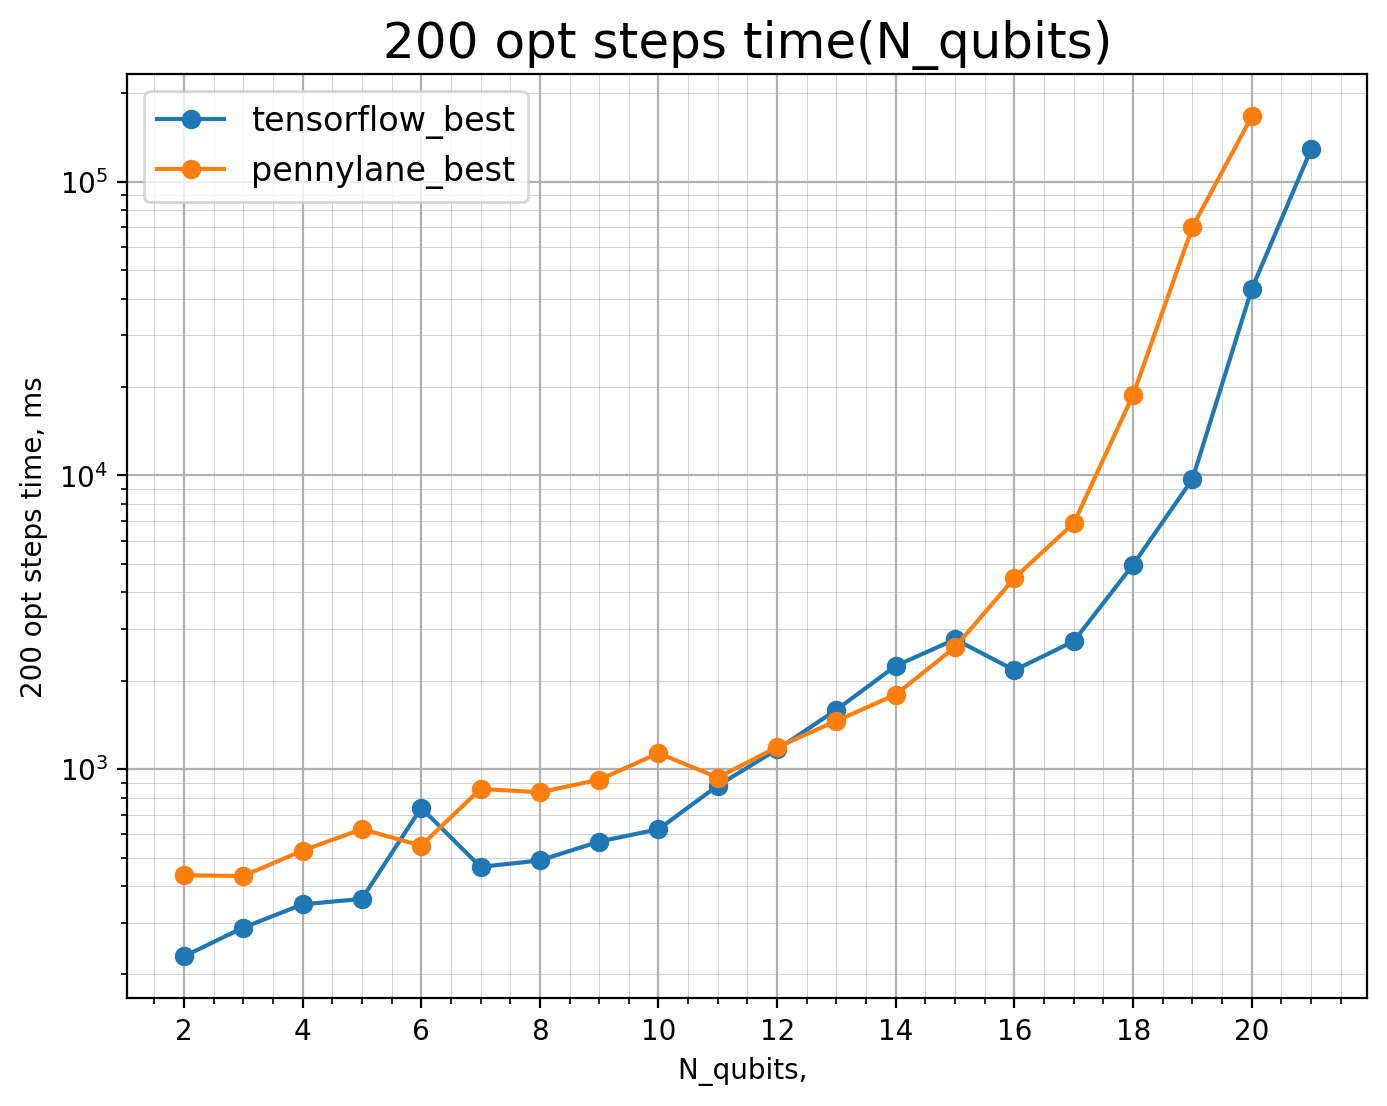

In [4]:
for file_name, label in results:
    try:
        df = pd.read_csv(file_name)
    except FileNotFoundError as e:
        print(f"file {file_name} not found")
        continue
    x = df["n_qubits"]
    y = df['time[ms]']

    plt.errorbar(x, y, fmt="o-", xerr=None, yerr=None, label=label, capsize=4, ms=6)

make_beautiful_plot(xname, xunit, yname, yunit)
plt.yscale('log')

plt.legend(fontsize=12)